In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#data ingestion
df=pd.read_csv('./data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe(include='object').T

,count,unique,top,freq
gender,1000,2,female,518
race_ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


In [5]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
## Datachecks to perform

#check missing value

In [8]:
df.isnull().sum()
#no missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
#check duplicates
df.duplicated().sum()
#No duplicates are there

0

In [10]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(df[col].value_counts(),'\n')

gender
female    518
male      482
Name: count, dtype: int64 

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

test_preparation_course
none         642
completed    358
Name: count, dtype: int64 



In [11]:
#define numerical features and the categorical feature

numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Numeric features are : ",numeric_feature)
print("Categorical  features are : ",categorical_feature)

Numeric features are :  ['math_score', 'reading_score', 'writing_score']
Categorical  features are :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
# Adding columns for Total score and Average
df['total_score'] = df['math_score'] +df['reading_score'] + df['writing_score']
df['avg'] = round(df['total_score'] /3,2)

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [15]:
reading_higher = df[ df['reading_score'] >= 80 ]['avg'].count()
writing_higher = df[ df['writing_score'] >= 80]['avg'].count()
math_higher = df[ df['math_score'] >= 80 ]['avg'].count()

print('The number of students with higher marks in reading :',reading_higher)
print('The number of students with higher marks in writing :',writing_higher)
print('The number of students with math marks in reading :',math_higher)

The number of students with higher marks in reading : 249
The number of students with higher marks in writing : 235
The number of students with math marks in reading : 193


In [16]:
reading_lower = df[ df['reading_score'] <=20 ]['avg'].count()
writing_lower = df[ df['writing_score'] <=20 ]['avg'].count()
math_lower = df[ df['math_score'] <=20 ]['avg'].count()

print('The number of students with less than 20 marks in reading :',reading_lower)
print('The number of students with less than 20 marks in writing :',writing_lower)
print('The number of students with less than 20 marks in math :',math_lower)

The number of students with less than 20 marks in reading : 1
The number of students with less than 20 marks in writing : 3
The number of students with less than 20 marks in math : 4


In [17]:
#EDA

<Axes: xlabel='avg', ylabel='Count'>

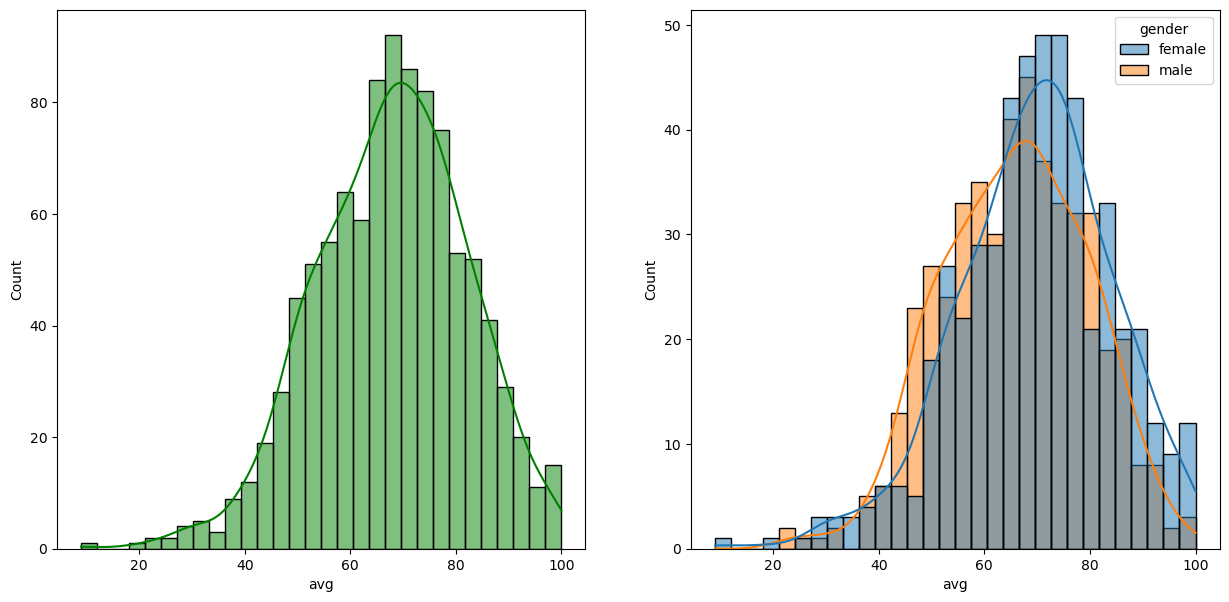

In [18]:
fig,axes = plt.subplots(1,2,figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='avg',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='avg',bins=30,hue='gender',kde=True)

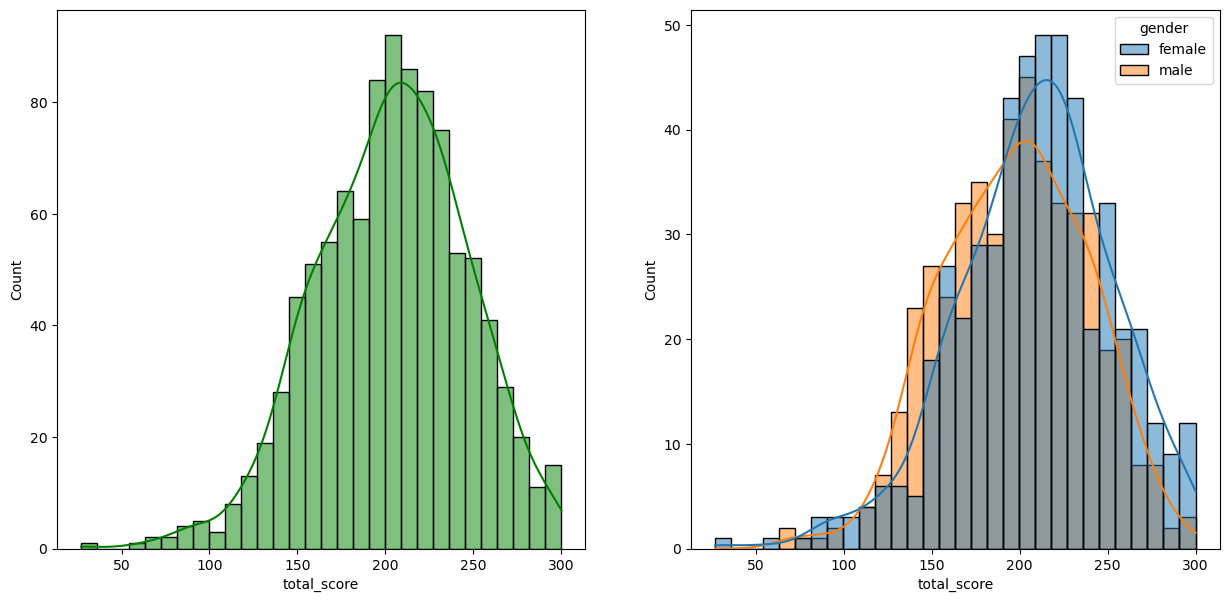

In [22]:
fig,axes = plt.subplots(1,2,figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',bins=30,hue='gender',kde=True)
plt.show()

In [ ]:
# Female students performs better than the male students

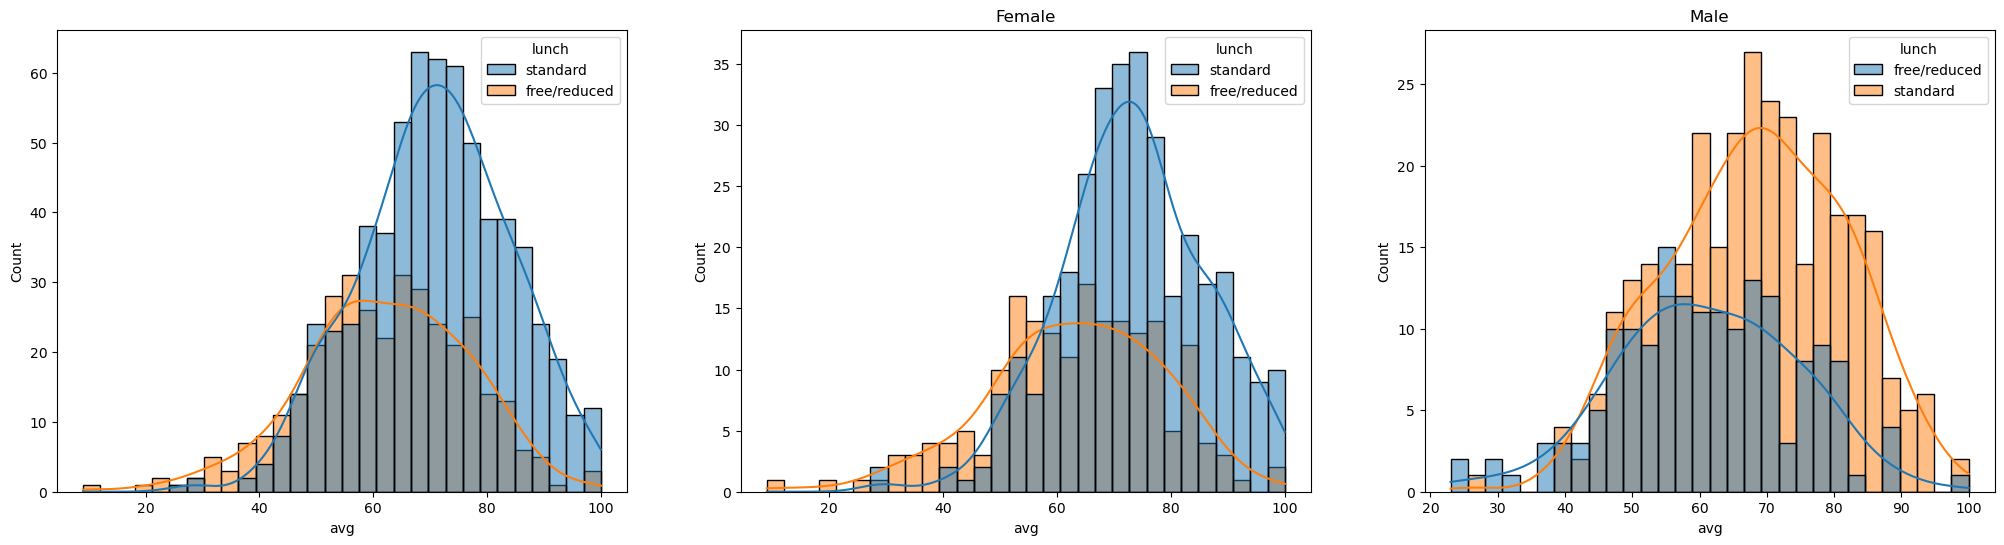

In [28]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='avg',bins=30,kde=True,hue='lunch')
plt.subplot(1,3,2)
plt.title('Female')
sns.histplot(data=df[df['gender'] == 'female'],x='avg',hue='lunch' ,bins=30,kde=True)
plt.subplot(1,3,3)
plt.title('Male')
sns.histplot(data=df[df['gender'] == 'male'],x='avg',hue='lunch' ,bins=30,kde=True)
plt.show()

In [32]:
#insights :

#standard lunch helps perform well in exams be it male or female
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg'],
      dtype='object')

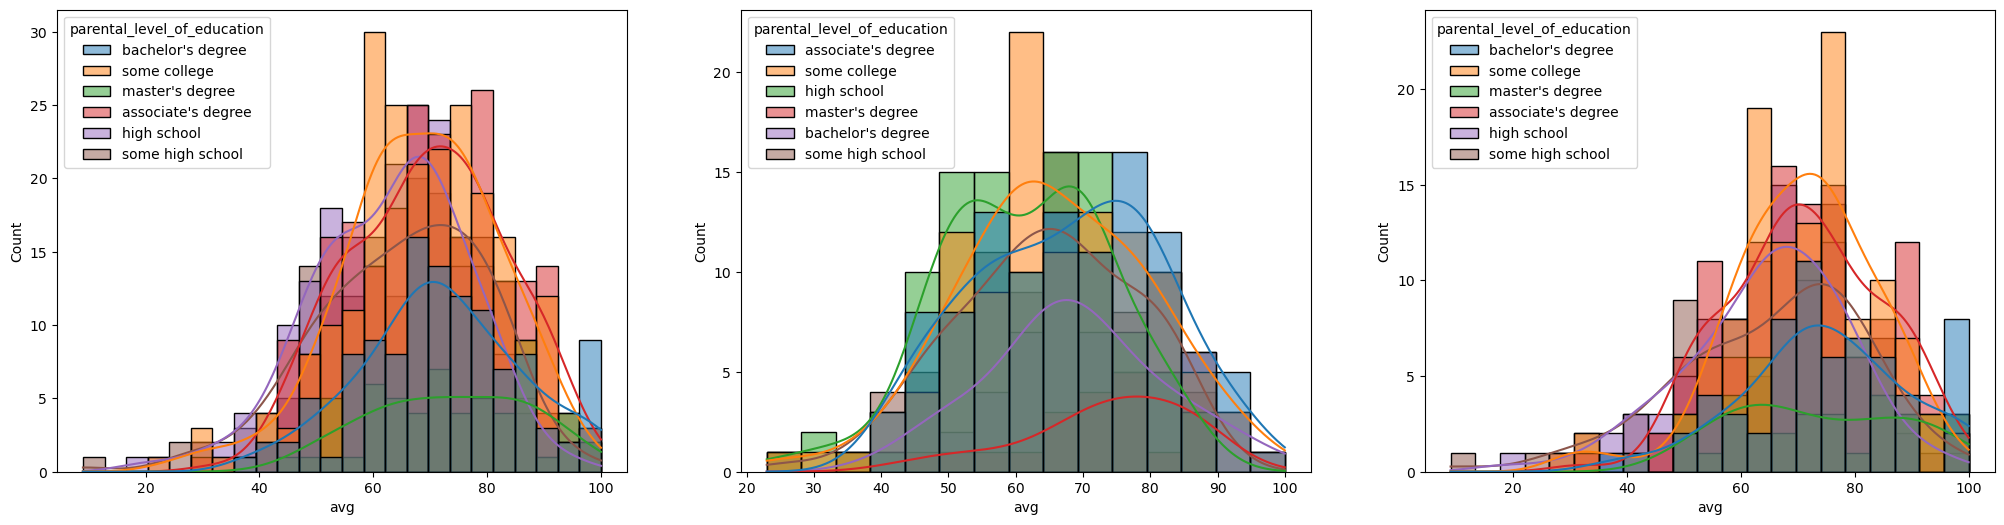

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg',kde=True,hue='parental_level_of_education')
plt.show()

#insights

1. In general Parental level of education doesn't affect the student performance
2. Second plot shows that Parents with Associate degree and the masters degree and their Male child performs better.
3. No effect of Parental education

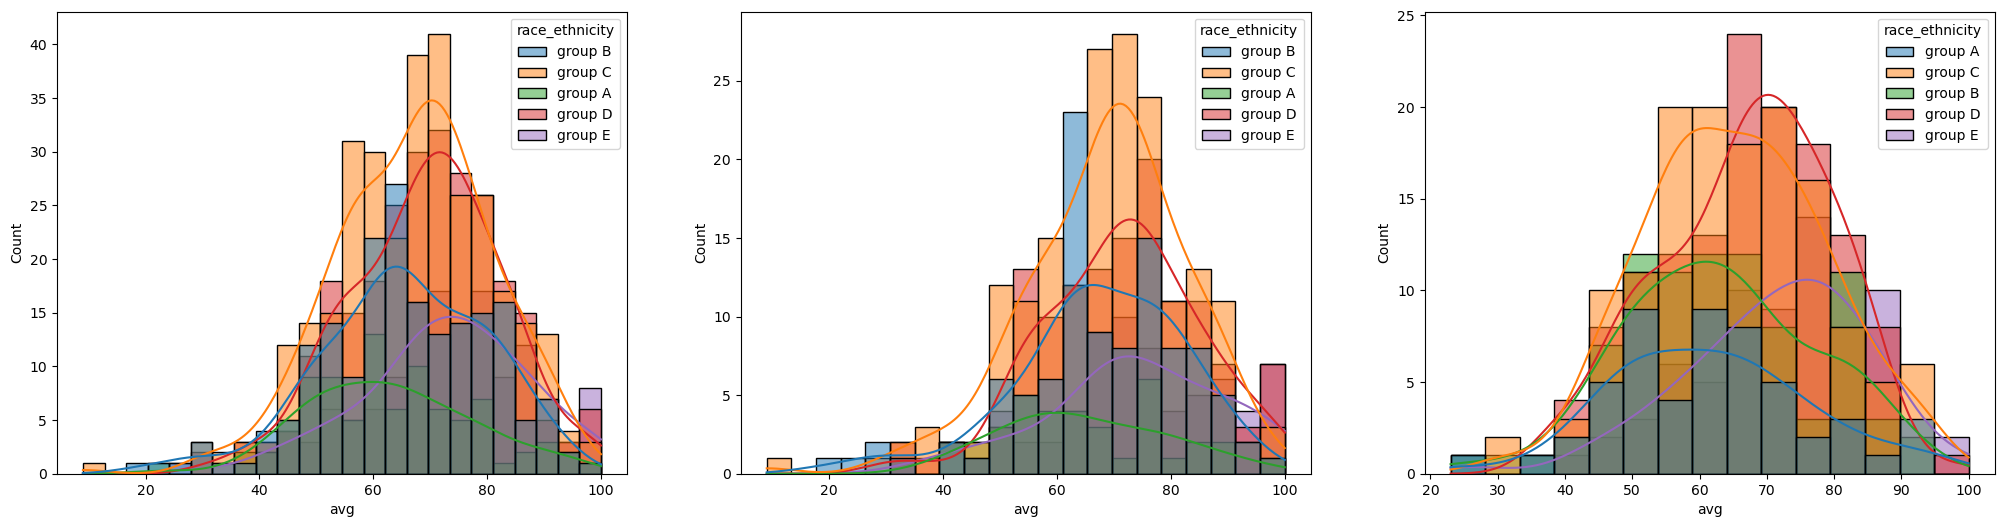

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='avg',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='avg',kde=True,hue='race_ethnicity')
plt.show()

1. In general group A and B performs poor irrespective of their gender.
2. In case of male there is no effect.
3. In case of female group E and group D performs better and group A and B performs poor

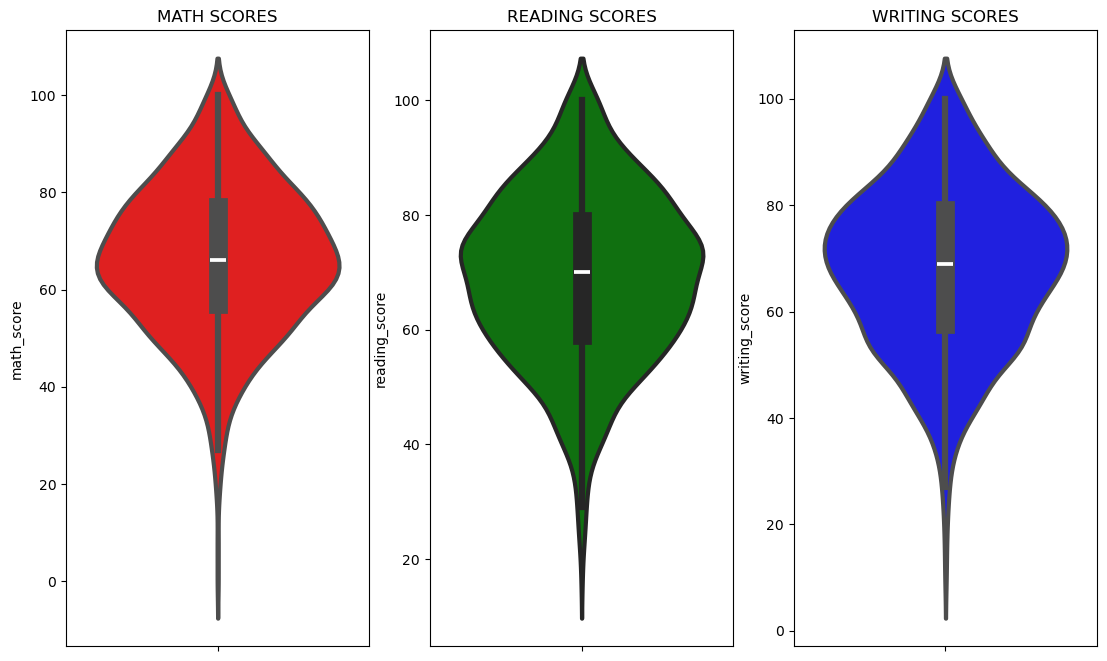

In [37]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [38]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg'],
      dtype='object')

#### Insights
- From the above three plots its clearly visible that most of the students score in
between 60-80 in Maths whereas in reading and writing most of them score from 50-80

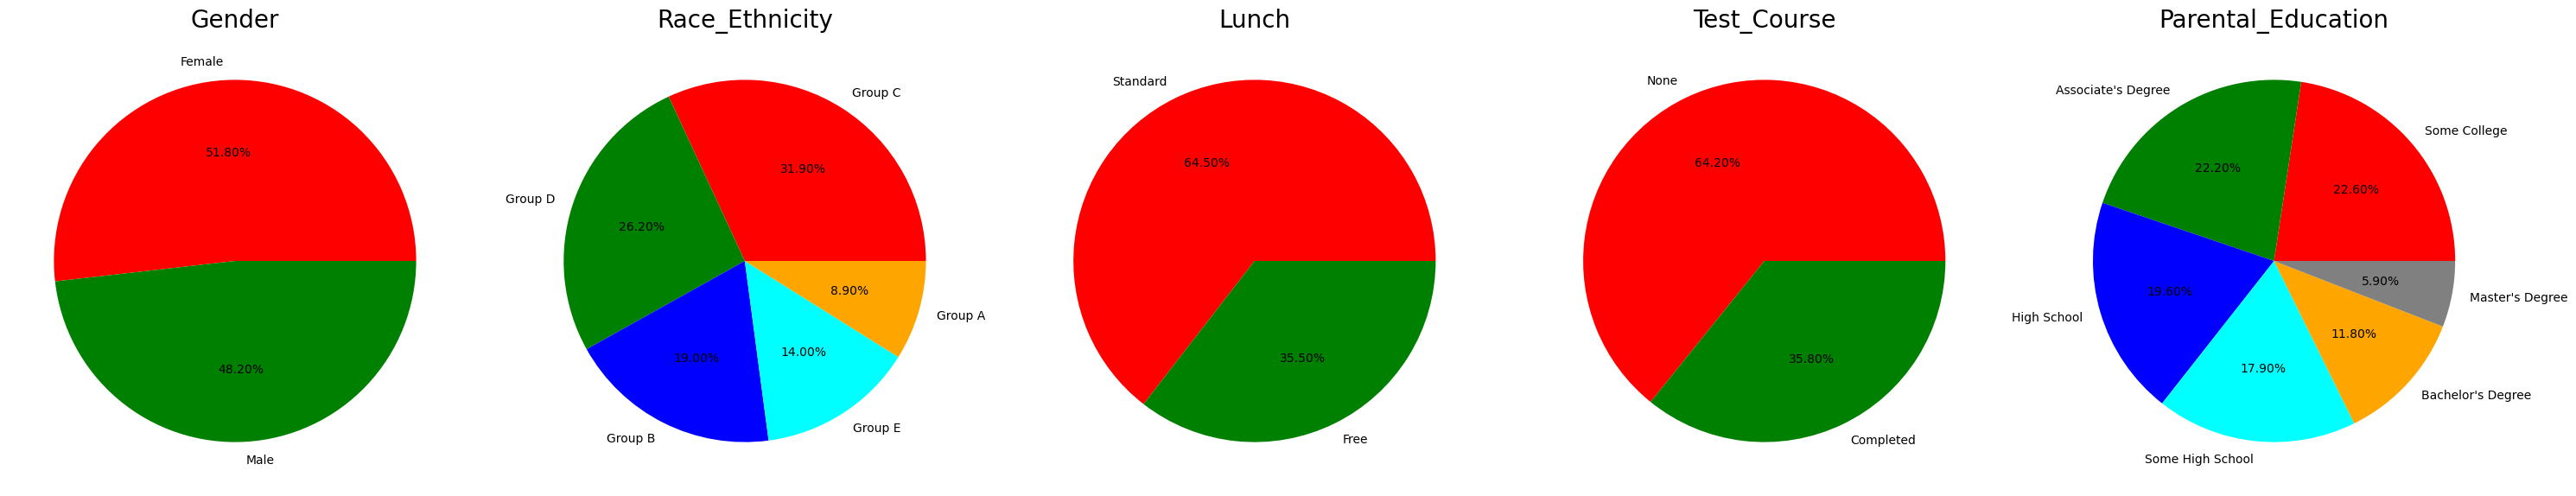

In [44]:
plt.figure( figsize = (30, 12) )

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

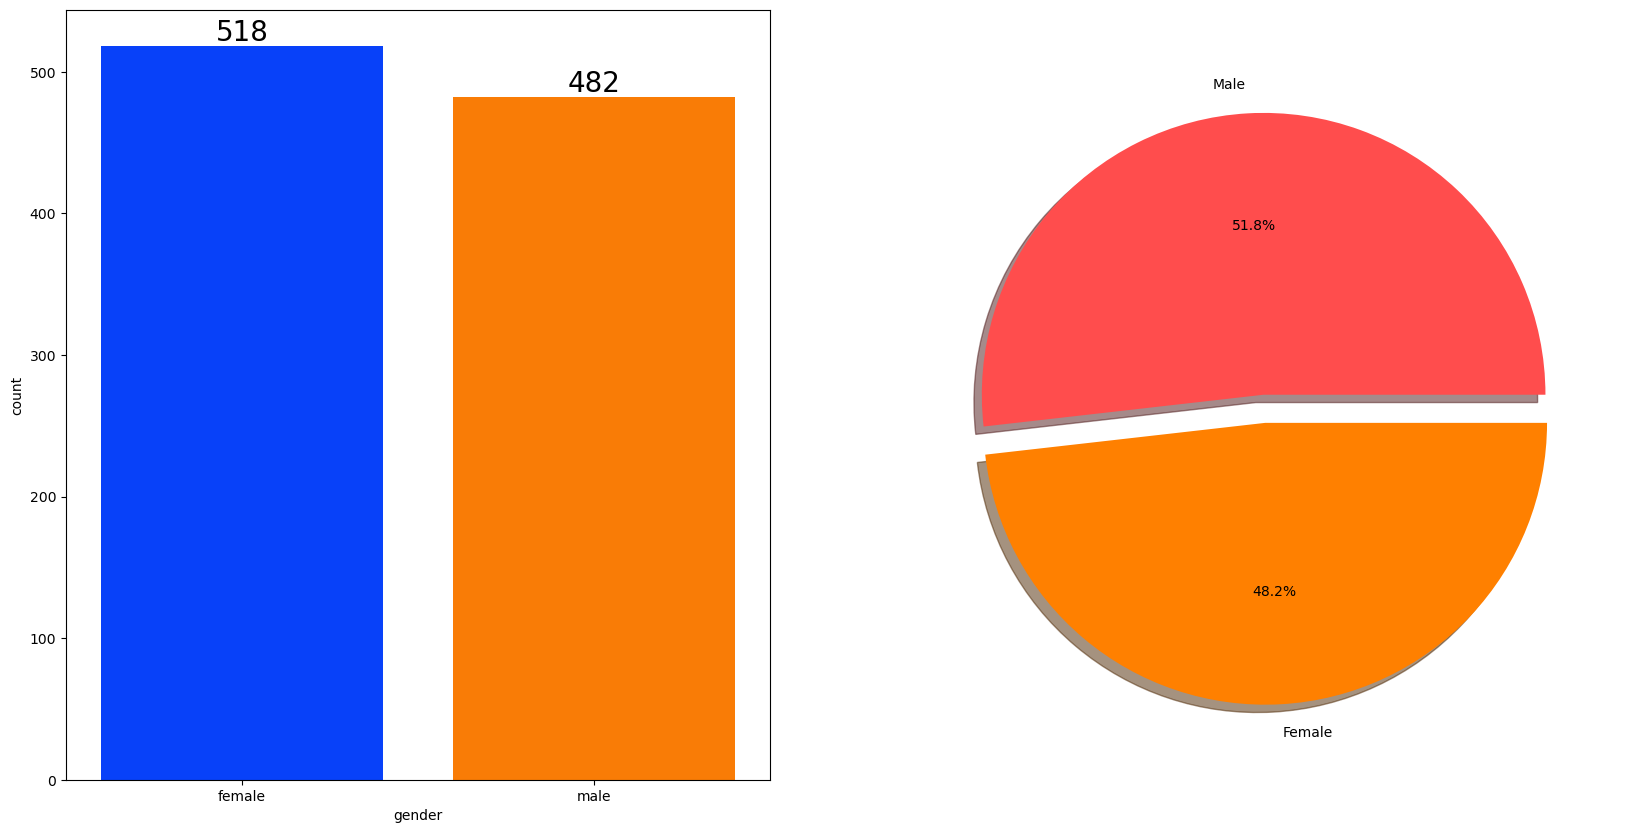

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [55]:
gender_group = df.groupby('gender')[['avg','math_score']].mean()
gender_group

,avg,math_score
gender,,
female,69.569498,63.633205
male,65.837303,68.728216


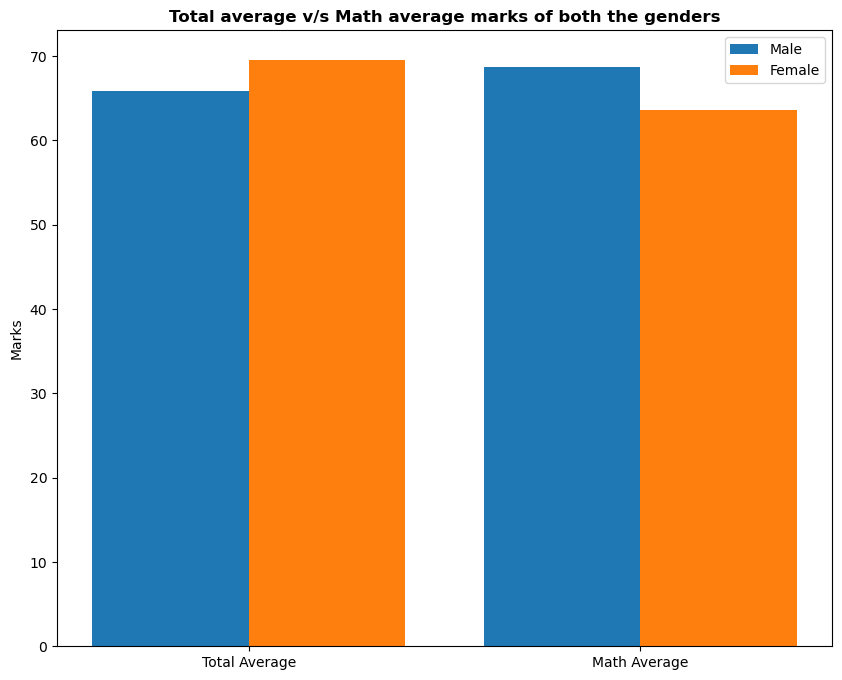

In [56]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()